In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
. PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

Attribute Information:

Class Values:

unacc, acc, good, vgood

Attributes:

buying: vhigh, high, med, low.
maint: vhigh, high, med, low.
doors: 2, 3, 4, 5more.
persons: 2, 4, more.
lug_boot: small, med, big.
safety: low, med, high

In [3]:
df = pd.read_csv("13-car_evaluation.csv")

In [4]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.shape

(1727, 7)

In [6]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
df.columns = col_names

In [9]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
for col in df.columns:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [12]:
#class -> target variable, doors & persons -> numeric, rest -> categorical variables

In [13]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [14]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [15]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [16]:
#If “5more” actually means 6 or 7 doors (e.g., vans, buses), you’re losing some information. But if the vast majority are 5, you’re okay.

In [17]:
df['doors'] = df['doors'].replace('5more', '5')

In [18]:
df['doors'].unique()

array(['2', '3', '4', '5'], dtype=object)

In [19]:
df['doors'] = df['doors'].astype(int)

In [20]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [21]:
# same here, replacing more with 5 might be a good idea or not depending on context, we are going to go ahead and 
# replace more with 5 here

In [22]:
df['persons'] = df['persons'].replace('more', '5')

In [23]:
df['persons'] = df['persons'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int64 
 3   persons   1727 non-null   int64 
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [25]:
X = df.drop(['class'], axis=1)
y = df['class']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 15)

In [27]:
X_train.shape, X_test.shape

((1208, 6), (519, 6))

In [28]:
# ordinal encoding seems logical choice for buying, maintaining, lug_boot and safety
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

# Define categorical and numerical features
categorical_cols = ['buying', 'maint', 'lug_boot', 'safety']
numerical_cols = ['doors', 'persons']

# Create the ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=[
    ['low', 'med', 'high', 'vhigh'],    # buying
    ['low', 'med', 'high', 'vhigh'],    # maint
    ['small', 'med', 'big'],            # lug_boot
    ['low', 'med', 'high']              # safety
])

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('transformation_name_doesnt_matter', ordinal_encoder, categorical_cols)
    ],
    remainder='passthrough'  # keeps 'doors' and 'persons' as is
)

# Apply transformation
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [29]:
pd.DataFrame(X_train_transformed)[4].unique() # it didn't change doors and persons

array([3., 5., 2., 4.])

In [30]:
pd.DataFrame(X_test_transformed)[4].unique()# it didn't change doors and persons

array([4., 5., 2., 3.])

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
tree_model.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [33]:
y_pred = tree_model.predict(X_test_transformed)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7861271676300579
[[ 62   0  59   0]
 [ 21   0   0   0]
 [ 10   0 346   0]
 [ 21   0   0   0]]
              precision    recall  f1-score   support

         acc       0.54      0.51      0.53       121
        good       0.00      0.00      0.00        21
       unacc       0.85      0.97      0.91       356
       vgood       0.00      0.00      0.00        21

    accuracy                           0.79       519
   macro avg       0.35      0.37      0.36       519
weighted avg       0.71      0.79      0.75       519



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Text(0.3333333333333333, 0.875, 'x[5] <= 3.0\ngini = 0.451\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 0.5\ngini = 0.576\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 1.5\ngini = 0.63\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.5, 0.125, 'gini = 0.647\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.498\nsamples = 260\nvalue = [121, 0, 139, 0]')]

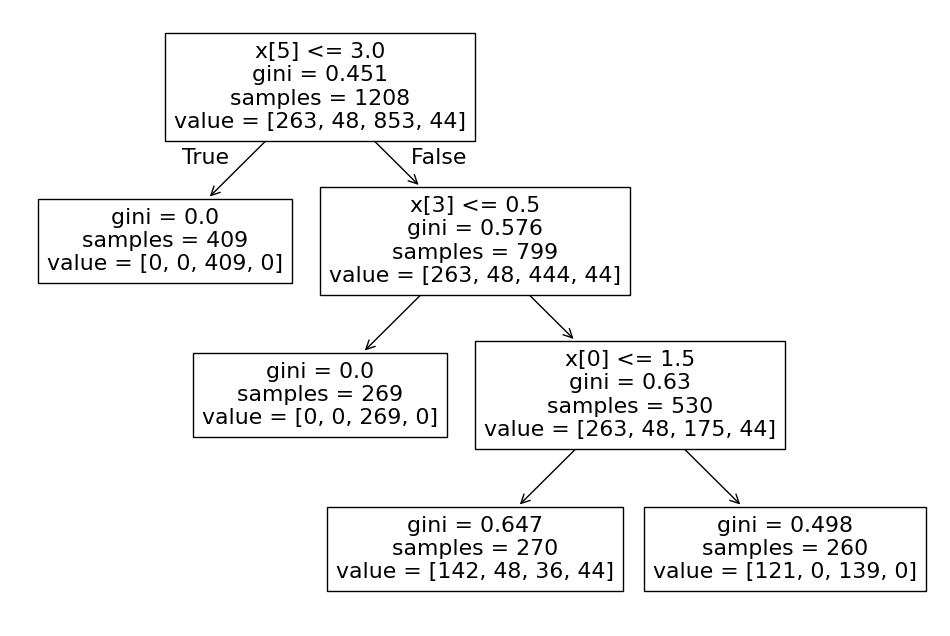

In [35]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(tree_model.fit(X_train_transformed, y_train))

In [36]:
# let's do hyperparameter tuning and see max depth effect

In [37]:
param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,15,None],
    'max_features':['auto','sqrt','log2']
}

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
tree_model=DecisionTreeClassifier()

In [40]:
grid=GridSearchCV(tree_model,param_grid=param,cv=5,scoring='accuracy')

In [41]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train_transformed,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [42]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 15,
 'max_features': 'log2',
 'splitter': 'best'}

In [43]:
grid.best_score_

0.9288055965158944

In [44]:
y_pred=grid.predict(X_test_transformed)

In [45]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9344894026974951
[[104   2  13   2]
 [  2  18   0   1]
 [ 13   0 343   0]
 [  1   0   0  20]]
              precision    recall  f1-score   support

         acc       0.87      0.86      0.86       121
        good       0.90      0.86      0.88        21
       unacc       0.96      0.96      0.96       356
       vgood       0.87      0.95      0.91        21

    accuracy                           0.93       519
   macro avg       0.90      0.91      0.90       519
weighted avg       0.93      0.93      0.93       519



In [46]:
tree_model_new=DecisionTreeClassifier(max_depth=None,max_features="sqrt",splitter="best",criterion="entropy")

In [47]:
tree_model_new.fit(X_train_transformed, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt')

In [48]:
y_pred=tree_model_new.predict(X_test_transformed)

In [49]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9364161849710982
[[109   1  10   1]
 [  4  15   1   1]
 [ 11   0 345   0]
 [  1   3   0  17]]
              precision    recall  f1-score   support

         acc       0.87      0.90      0.89       121
        good       0.79      0.71      0.75        21
       unacc       0.97      0.97      0.97       356
       vgood       0.89      0.81      0.85        21

    accuracy                           0.94       519
   macro avg       0.88      0.85      0.86       519
weighted avg       0.94      0.94      0.94       519



[Text(0.5067463235294117, 0.9615384615384616, 'x[5] <= 3.0\nentropy = 1.192\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.5020404411764706, 0.8846153846153846, 'entropy = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.5043933823529412, 0.9230769230769231, 'True  '),
 Text(0.511452205882353, 0.8846153846153846, 'x[1] <= 1.5\nentropy = 1.473\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.5090992647058823, 0.9230769230769231, '  False'),
 Text(0.2952941176470588, 0.8076923076923077, 'x[2] <= 0.5\nentropy = 1.735\nsamples = 392\nvalue = [138, 48, 171, 35]'),
 Text(0.10808823529411765, 0.7307692307692307, 'x[4] <= 2.5\nentropy = 1.336\nsamples = 130\nvalue = [37, 16, 77, 0]'),
 Text(0.04352941176470588, 0.6538461538461539, 'x[3] <= 1.5\nentropy = 0.911\nsamples = 34\nvalue = [5, 2, 27, 0]'),
 Text(0.023529411764705882, 0.5769230769230769, 'x[0] <= 1.5\nentropy = 0.454\nsamples = 21\nvalue = [2, 0, 19, 0]'),
 Text(0.018823529411764704, 0.5, 'x[0] <= 0.5\nentropy = 0.68

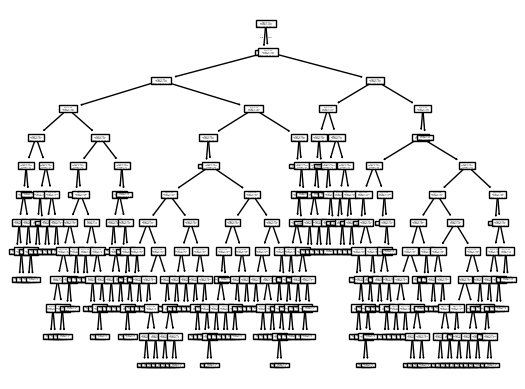

In [50]:
tree.plot_tree(tree_model_new.fit(X_train_transformed, y_train))

In [51]:
# as you can see without max_depth tree goes on and on, this may seem to increase accuracy in this dataset
# however in another example it may definetely increase chance of overfitting. so we need pruning.
# we can do prepruning or postpruning, playing with max_depth parameter. that's why i chose max_depth 3 to show you to begin with

In [52]:
df_new = pd.read_csv("11-iris.csv")

In [53]:
df_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
X=df_new.drop(['Id', 'Species'],axis=1)
y=df_new['Species']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [56]:
tree_model=DecisionTreeClassifier()

In [57]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.38461538461538464, 0.5, 'x[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 

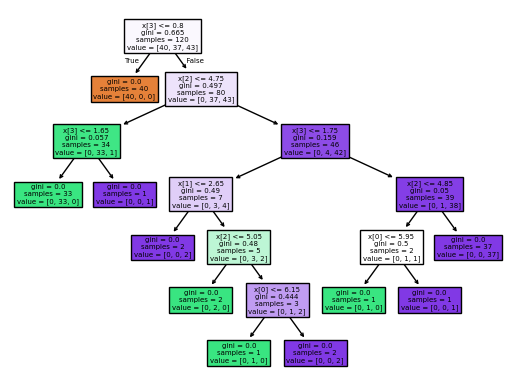

In [58]:
tree.plot_tree(tree_model,filled=True)

In [59]:
# we can clearly see in this case, we can stop at depth 3 because most probably the class will be defined at that point
# rest of the tree is kind of redundant

In [60]:
y_pred=tree_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9666666666666667
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [61]:
tree_model=DecisionTreeClassifier(max_depth=3)

In [62]:
tree_model.fit(X_train, y_train)
y_pred=tree_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9333333333333333
[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.93        30
   weighted avg       0.95      0.93      0.93        30

